In [0]:
#Connexion au drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Base de données : Consommation d'énergie - 1965-2018

In [0]:
downloaded = drive.CreateFile({'id': '138HThhJnZ2huay55IG29WV768a92_f1D'})
downloaded.GetContentFile('bp-stats-review-2019-all-data.xlsx')
cons_energie = pd.read_excel("bp-stats-review-2019-all-data.xlsx", 'Primary Energy Consumption', skiprows = [0, 3], header = 1)



-> Suppression lignes NaN

In [0]:
cons_energie = cons_energie.drop(cons_energie.index[110:117],0, inplace= False)
cons_energie = cons_energie.drop(['2018.1',	'2007-17',	'2018.2',	'Unnamed: 58',	'Unnamed: 59'], axis = 1)
cons_energie.head()

,Million tonnes oil equivalent,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Canada,115.910849,122.991657,129.026541,137.695457,145.303023,155.587992,159.794037,170.698240,181.241163,187.556717,185.469176,196.111211,205.538248,209.151938,211.629193,216.682425,210.677243,213.404145,211.693978,225.405949,232.375731,232.753895,240.772643,250.841406,253.629230,248.959371,249.176780,255.459400,261.004881,270.622255,276.541291,284.160333,286.588539,282.910417,291.885349,300.413822,293.888515,303.549133,305.679635,309.852518,313.583047,310.394164,322.059113,321.540727,304.885433,311.964130,327.203681,324.724983,337.019816,341.813863,339.043046,338.223484,343.696739,344.424157
1,Mexico,24.972964,26.432788,26.922222,29.291127,32.196346,34.320386,36.094722,39.916724,43.065295,47.492627,50.775610,54.009616,56.952879,64.238349,71.021967,77.443143,85.458176,89.125371,88.191172,92.249923,96.716048,93.984953,97.137908,97.799225,103.227648,108.603973,112.835898,114.741069,115.315197,122.074802,119.992831,123.752013,125.921360,131.586596,133.140591,139.399539,137.807104,142.317046,143.598709,151.381068,161.150426,166.318997,167.264862,170.836236,169.543061,174.578146,183.054676,184.181945,185.033923,184.141764,183.970404,186.358373,189.300608,186.913820
2,US,1249.642424,1320.037950,1365.733676,1448.932114,1526.191928,1577.850993,1610.270681,1692.888180,1762.245098,1716.951707,1674.177716,1765.631270,1812.216488,1819.342937,1841.161519,1774.179424,1721.830187,1649.015941,1641.204203,1728.574250,1724.019085,1733.986996,1792.919249,1874.835637,1919.015624,1922.421952,1919.262626,1948.530847,1989.194648,2026.309381,2069.075846,2138.498008,2155.343629,2169.427094,2207.391744,2258.031769,2206.694705,2239.832804,2248.699196,2294.746114,2297.446456,2280.438167,2314.171438,2258.634275,2148.679835,2223.278289,2204.148602,2148.453583,2208.025392,2232.931428,2213.209941,2212.662102,2222.480694,2300.640296
3,Total North America,1390.526237,1469.462395,1521.682440,1615.918698,1703.691297,1767.759372,1806.159440,1903.503145,1986.551556,1952.001051,1910.422503,2015.752097,2074.707616,2092.733224,2123.812679,2068.304991,2017.965605,1951.545457,1941.089354,2046.230122,2053.110865,2060.725844,2130.829800,2223.476268,2275.872501,2279.985296,2281.275303,2318.731316,2365.514725,2419.006438,2465.609968,2546.410354,2567.853528,2583.924107,2632.417684,2697.845130,2638.390324,2685.698984,2697.977540,2755.979700,2772.179929,2757.151328,2803.495413,2751.011238,2623.108329,2709.820564,2714.406958,2657.360511,2730.079131,2758.887056,2736.223390,2737.243959,2755.478041,2831.978273
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
cons_energie = cons_energie.dropna(how='all', inplace = False)
cons_energie.head()



,Million tonnes oil equivalent,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Canada,115.910849,122.991657,129.026541,137.695457,145.303023,155.587992,159.794037,170.698240,181.241163,187.556717,185.469176,196.111211,205.538248,209.151938,211.629193,216.682425,210.677243,213.404145,211.693978,225.405949,232.375731,232.753895,240.772643,250.841406,253.629230,248.959371,249.176780,255.459400,261.004881,270.622255,276.541291,284.160333,286.588539,282.910417,291.885349,300.413822,293.888515,303.549133,305.679635,309.852518,313.583047,310.394164,322.059113,321.540727,304.885433,311.964130,327.203681,324.724983,337.019816,341.813863,339.043046,338.223484,343.696739,344.424157
1,Mexico,24.972964,26.432788,26.922222,29.291127,32.196346,34.320386,36.094722,39.916724,43.065295,47.492627,50.775610,54.009616,56.952879,64.238349,71.021967,77.443143,85.458176,89.125371,88.191172,92.249923,96.716048,93.984953,97.137908,97.799225,103.227648,108.603973,112.835898,114.741069,115.315197,122.074802,119.992831,123.752013,125.921360,131.586596,133.140591,139.399539,137.807104,142.317046,143.598709,151.381068,161.150426,166.318997,167.264862,170.836236,169.543061,174.578146,183.054676,184.181945,185.033923,184.141764,183.970404,186.358373,189.300608,186.913820
2,US,1249.642424,1320.037950,1365.733676,1448.932114,1526.191928,1577.850993,1610.270681,1692.888180,1762.245098,1716.951707,1674.177716,1765.631270,1812.216488,1819.342937,1841.161519,1774.179424,1721.830187,1649.015941,1641.204203,1728.574250,1724.019085,1733.986996,1792.919249,1874.835637,1919.015624,1922.421952,1919.262626,1948.530847,1989.194648,2026.309381,2069.075846,2138.498008,2155.343629,2169.427094,2207.391744,2258.031769,2206.694705,2239.832804,2248.699196,2294.746114,2297.446456,2280.438167,2314.171438,2258.634275,2148.679835,2223.278289,2204.148602,2148.453583,2208.025392,2232.931428,2213.209941,2212.662102,2222.480694,2300.640296
3,Total North America,1390.526237,1469.462395,1521.682440,1615.918698,1703.691297,1767.759372,1806.159440,1903.503145,1986.551556,1952.001051,1910.422503,2015.752097,2074.707616,2092.733224,2123.812679,2068.304991,2017.965605,1951.545457,1941.089354,2046.230122,2053.110865,2060.725844,2130.829800,2223.476268,2275.872501,2279.985296,2281.275303,2318.731316,2365.514725,2419.006438,2465.609968,2546.410354,2567.853528,2583.924107,2632.417684,2697.845130,2638.390324,2685.698984,2697.977540,2755.979700,2772.179929,2757.151328,2803.495413,2751.011238,2623.108329,2709.820564,2714.406958,2657.360511,2730.079131,2758.887056,2736.223390,2737.243959,2755.478041,2831.978273
5,Argentina,26.914442,27.809713,28.635373,29.623572,30.644712,28.937326,30.747979,31.299226,32.626256,34.004124,33.074733,34.886373,36.504839,37.193775,39.414452,39.315913,37.890112,38.806032,40.490876,40.378242,39.433208,43.553360,45.508609,46.340401,44.365739,43.815873,44.326519,47.672370,49.164235,50.020646,52.070803,55.823949,55.416796,57.479423,56.274490,58.482064,57.798775,55.090871,59.213678,62.486685,66.705058,70.147520,73.341197,74.658291,73.284787,77.182535,78.724688,81.019815,84.488737,84.127455,86.098900,85.917292,86.103674,85.052439


In [0]:
cons_energie = cons_energie.set_index('Million tonnes oil equivalent')
cons_energie

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Million tonnes oil equivalent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Canada,115.910849,122.991657,129.026541,137.695457,145.303023,155.587992,159.794037,170.698240,181.241163,187.556717,185.469176,196.111211,205.538248,209.151938,211.629193,216.682425,210.677243,213.404145,211.693978,225.405949,232.375731,232.753895,240.772643,250.841406,253.629230,248.959371,249.176780,255.459400,261.004881,270.622255,276.541291,284.160333,286.588539,282.910417,291.885349,300.413822,293.888515,303.549133,305.679635,309.852518,313.583047,310.394164,322.059113,321.540727,304.885433,311.964130,327.203681,324.724983,337.019816,341.813863,339.043046,338.223484,343.696739,344.424157
Mexico,24.972964,26.432788,26.922222,29.291127,32.196346,34.320386,36.094722,39.916724,43.065295,47.492627,50.775610,54.009616,56.952879,64.238349,71.021967,77.443143,85.458176,89.125371,88.191172,92.249923,96.716048,93.984953,97.137908,97.799225,103.227648,108.603973,112.835898,114.741069,115.315197,122.074802,119.992831,123.752013,125.921360,131.586596,133.140591,139.399539,137.807104,142.317046,143.598709,151.381068,161.150426,166.318997,167.264862,170.836236,169.543061,174.578146,183.054676,184.181945,185.033923,184.141764,183.970404,186.358373,189.300608,186.913820
US,1249.642424,1320.037950,1365.733676,1448.932114,1526.191928,1577.850993,1610.270681,1692.888180,1762.245098,1716.951707,1674.177716,1765.631270,1812.216488,1819.342937,1841.161519,1774.179424,1721.830187,1649.015941,1641.204203,1728.574250,1724.019085,1733.986996,1792.919249,1874.835637,1919.015624,1922.421952,1919.262626,1948.530847,1989.194648,2026.309381,2069.075846,2138.498008,2155.343629,2169.427094,2207.391744,2258.031769,2206.694705,2239.832804,2248.699196,2294.746114,2297.446456,2280.438167,2314.171438,2258.634275,2148.679835,2223.278289,2204.148602,2148.453583,2208.025392,2232.931428,2213.209941,2212.662102,2222.480694,2300.640296
Total North America,1390.526237,1469.462395,1521.682440,1615.918698,1703.691297,1767.759372,1806.159440,1903.503145,1986.551556,1952.001051,1910.422503,2015.752097,2074.707616,2092.733224,2123.812679,2068.304991,2017.965605,1951.545457,1941.089354,2046.230122,2053.110865,2060.725844,2130.829800,2223.476268,2275.872501,2279.985296,2281.275303,2318.731316,2365.514725,2419.006438,2465.609968,2546.410354,2567.853528,2583.924107,2632.417684,2697.845130,2638.390324,2685.698984,2697.977540,2755.979700,2772.179929,2757.151328,2803.495413,2751.011238,2623.108329,2709.820564,2714.406958,2657.360511,2730.079131,2758.887056,2736.223390,2737.243959,2755.478041,2831.978273
Argentina,26.914442,27.809713,28.635373,29.623572,30.644712,28.937326,30.747979,31.299226,32.626256,34.004124,33.074733,34.886373,36.504839,37.193775,39.414452,39.315913,37.890112,38.806032,40.490876,40.378242,39.433208,43.553360,45.508609,46.340401,44.365739,43.815873,44.326519,47.672370,49.164235,50.020646,52.070803,55.823949,55.416796,57.479423,56.274490,58.482064,57.798775,55.090871,59.213678,62.486685,66.705058,70.147520,73.341197,74.658291,73.284787,77.182535,78.724688,81.019815,84.488737,84.127455,86.098900,85.917292,86.103674,85.052439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Total Asia Pacific,441.550955,482.885313,506.079866,544.087709,619.804052,704.886495,771.425046,817.967012,885.102269,902.151972,936.007469,983.260052,1037.276188,1106.238434,1157.607913,1168.056063,1175.033065,1186.797386,1240.603098,1326.656460,1395.845132,1455.659768,1537.674491,1649.773087,1739.661941,1811.580673,1895.980324,1983.728783,2088.325548,2203.769271,2305.723345

In [0]:
cons_energie.info()

In [0]:
energieMonde = pd.DataFrame(cons_energie[cons_energie.index == 'Total World'])

energieMonde['YEAR'] = 'Energie Totale'
energieMonde.set_index('YEAR', inplace=True)
energieMonde = energieMonde.T
energieMonde

# Base de données Population mondiale (1965- 2018)
(suppression 1960 à 1965)

In [0]:
#Database Population Mondial 1960-2018
downloaded = drive.CreateFile({'id': '1WRAnnYVo4JR-_10DhWNIDhE1wKUXiG2q'})
downloaded.GetContentFile('API_SP.POP.TOTL_DS2_fr_csv_v2_937567.csv')
pop = pd.read_csv("API_SP.POP.TOTL_DS2_fr_csv_v2_937567.csv", skiprows = [0, 3], header = 1)

In [0]:
pop.head()

In [0]:
pop = pop.drop(['Country Code',	'Indicator Name',	'Indicator Code',	'1960',	'1961',	'1962',	'1963',	'1964', '2019', 'Unnamed: 64'], axis = 1)
pop

In [0]:
pop = pop.set_index('Country Name')
pop

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0
Afghanistan,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0
Angola,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0
Albanie,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0
Andorre,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,1827000.0,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,2086000.0,1966000.0,1762000.0,1700000.0,1701154.0,1702310.0,1703466.0,1704622.0,1705780.0,1719536.0,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,1845300.0
"Yémen, Rép. du",5727751.0,5816247.0,5907874.0,6001852.0,6097035.0,6193384.0,6290365.0,6390574.0,6500816.0,6629999.0,6784695.0,6967941.0,7178675.0,7414158.0,7669694.0,7941898.0,8231910.0,8541605.0,8869370.0,9213084.0,9572175.0,9941109.0,10322043.0,10730862.0,11189177.0,

# Graphiques 



-> Population mondiale


In [0]:
popMonde = pd.DataFrame(pop[pop.index == 'Monde'])
popMonde['YEAR'] = 'Population Totale'
popMonde.set_index('YEAR', inplace=True)
popMonde = popMonde.T
popMonde

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


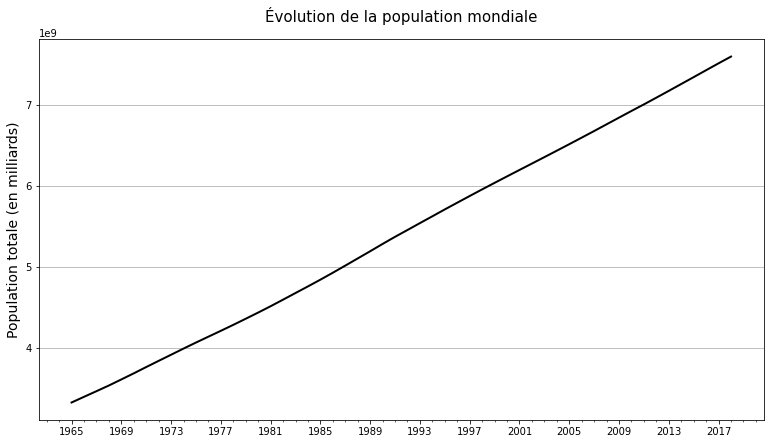

In [0]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.figure(figsize=(13, 7))
plt.plot(popMonde.index, popMonde['Population Totale'], lw = 2, c= 'black')
plt.title("Évolution de la population mondiale", y = 1.03, fontsize=15)


plt.ylabel('Population totale (en milliards)', fontsize=14)
plt.xticks()


ax = plt.axes()
ax.xaxis.set_major_locator(MultipleLocator(4))
ax.xaxis.set_minor_locator(MultipleLocator(1))

plt.grid(which='major', axis='y')

plt.show()

-> Consommation d'énergie

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


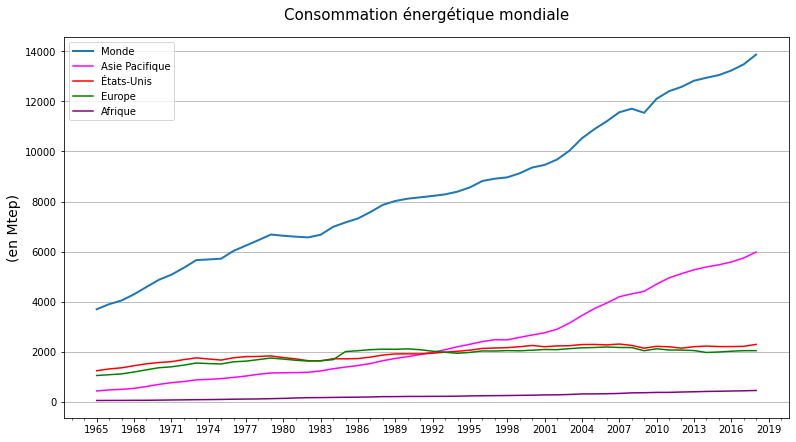

In [0]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.figure(figsize=(13, 7))

# Consommation mondiale d'énergie 
plt.plot(energieMonde.index, energieMonde['Energie Totale'], lw = 2, label = 'Monde')
plt.title("Consommation énergétique mondiale", y = 1.03, fontsize=15)
plt.ylabel('(en Mtep)', fontsize=14)
plt.xticks()


#Consommation d'énergie Asie Pacifique
plt.plot(energieAsiePacific.index, energieAsiePacific['Energie Asie Pacifique'], c= 'magenta', label = 'Asie Pacifique')

# Consommation d'énergie North America
#plt.plot(energieNorth_America.index, energieNorth_America['Energie North America'], c = 'red', label= 'Amérique du Nord')

# Consommation d'énergie US
plt.plot(energieUS.index, energieUS['Energie US'], c = 'red', label= 'États-Unis' )

#Consommation d'énergie Europe
plt.plot(energieEurope.index, energieEurope['Energie Europe'], c = 'green', label = 'Europe')

#Consommation d'énergie Afrique
plt.plot(energieAfrique.index, energieAfrique['Energie Afrique'], c = 'purple', label = 'Afrique')


ax = plt.axes()
ax.xaxis.set_major_locator(MultipleLocator(3))
ax.xaxis.set_minor_locator(MultipleLocator(1))
plt.legend()
plt.grid(which='major', axis='y')

plt.show()

In [0]:
energieMonde = pd.DataFrame(cons_energie[cons_energie.index == 'Total World'])

energieMonde['YEAR'] = 'Energie Totale'
energieMonde.set_index('YEAR', inplace=True)
energieMonde = energieMonde.T
energieMonde

In [0]:
energieNorth_America = pd.DataFrame(cons_energie[cons_energie.index == 'Total North America'])
energieNorth_America
energieNorth_America['YEAR'] = 'Energie North America'
energieNorth_America.set_index('YEAR', inplace=True)
energieNorth_America = energieNorth_America.T
energieNorth_America

In [0]:
energieUS = pd.DataFrame(cons_energie[cons_energie.index == 'US'])

energieUS['YEAR'] = 'Energie US'
energieUS.set_index('YEAR', inplace=True)
energieUS = energieUS.T
energieUS

In [0]:
energieEurope = pd.DataFrame(cons_energie[cons_energie.index == 'Total Europe'])
energieEurope['YEAR'] = 'Energie Europe'
energieEurope.set_index('YEAR', inplace=True)
energieEurope = energieEurope.T
energieEurope

In [0]:
energieAfrique = pd.DataFrame(cons_energie[cons_energie.index == 'Total Africa'])
energieAfrique['YEAR'] = 'Energie Afrique'
energieAfrique.set_index('YEAR', inplace=True)
energieAfrique = energieAfrique.T
energieAfrique

In [0]:
energieAsiePacific = pd.DataFrame(cons_energie[cons_energie.index == 'Total Asia Pacific'])
energieAsiePacific['YEAR'] = 'Energie Asie Pacifique'
energieAsiePacific.set_index('YEAR', inplace=True)
energieAsiePacific = energieAsiePacific.T
energieAsiePacific

In [0]:
popMonde['YEAR'] = pd.to_numeric(popMonde.index)


In [0]:
energieMonde['YEAR'] = pd.to_numeric(energieMonde.index)

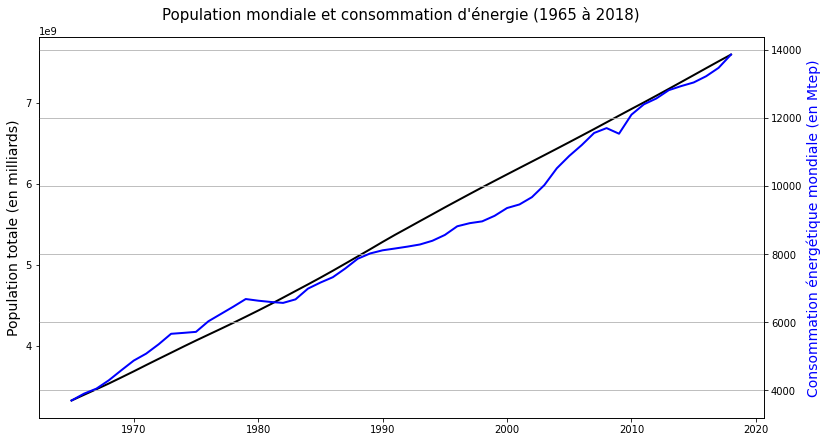

In [0]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter


fig, ax1 = plt.subplots(figsize=(13, 7))
ax1.plot(popMonde['YEAR'], popMonde['Population Totale'], lw = 2, c= 'black')
ax1.set_title("Population mondiale et consommation d'énergie (1965 à 2018)", y = 1.03, fontsize=15)
ax1.set_ylabel('Population totale (en milliards)', fontsize=14, color= 'black')


ax2 = ax1.twinx()
ax2.plot(energieMonde['YEAR'], energieMonde['Energie Totale'], lw = 2, color = 'blue')
ax2.set_ylabel('Consommation énergétique mondiale (en Mtep)', fontsize=14, color = 'blue')


#ax = plt.axes()
#ax.xaxis.set_major_locator(MultipleLocator(4))
#ax.xaxis.set_minor_locator(MultipleLocator(1))

plt.grid(which='major', axis='y')

plt.show()